# Hyper-graphical extensions of randomly grown neural networks #

_Ramón Nartallo-Kaluarachchi; 2021-2022_

_MA4J5 Structures of Complex Systems; Mathematics Institute - University of Warwick_

### 1. Introduction ###

Within both machine learning and computational neuroscience, there is a sub field focused on building biologically motivated artificial neural networks that mimic the function of the human brain. However, even these networks typically neglect network topology and structure as a important biological feature, often opting for random or arbitrary connectivity. An interesting approach to the problem of 
producing biologically motivated and plausible connectivity in networks is emulating the dynamics of biological neural growth.

In the model discussed here, neurons are modelled as rooted binary trees governed by a branching process. The branching rate in this state-of-the-art model is assumed to be 'a monotonically decreasing function of time'. In this project, the model used was presented by Ajazi et al. [1]. It is a simplification of the NETMORPH model that assumes a constant branching rate for all times [2]. The model is also restricted to 2D.

This Jupyter notebook and the associated Python files allow for the simulation of the models discussed both here and in the report. The notebook, report and Python scripts are available at https://github.com/rnartallo/randomlygrownnetworks. The code is written in Python3.

In order to run the code, one must clone the entire repository with all accompanying Python files and install the following dependencies:

In [1]:
import random as r
import numpy as np
import math as m
import matplotlib.pyplot as plt
import networkx as nx
import mynetworkx as my_nx

### 2. A model of a single neuron ###

_You will need ***'singleneuronmodel.py'*** for this chapter._

The model presented here was first presented Ajazi et al. (2015) [1].
It is a direct simplification of the model presented in Acimov´ıc et
al. (2011) [3].

A __neuron__ is assumed to be, at any time, a rooted, random tree.
We call the root the __soma__ of the neuron. The branches of the tree
represent the growing __axons__ of the neuron.
We denote our time parameter by $t \geq 0$. At time $t = 0$, the neuron
is represented by a single point $s \in \mathbb{R}^2$, the soma. At any time $t$, the
neuron is represented by the random tree $N_s(t)\subset \mathbb{R}^2$. The neural
growth is governed by the two processes of ***elongation*** and ***branching***
of axons.

At $t=0$, a segment begins to grown from $s$ in a random direction between two parameters: the angle upper-bound, $\theta_U$; and the angle lower-bound, $\theta_L$. The segment grows with constant speed, set to 1. This is not a restriction as time can be rescaled. At a random time $\tau_0$, governed by an exponential distribution with mean $1/\lambda$, the segments splits into two new segments with random directions between the bounds. These develop independently in the same manner. Each of these segments will split at times $\tau_0+\tau_1$ and $\tau_0+\tau_2$ respectively. The $\tau_i$ are independently, identically distributed from the same exponential distribution with mean $1/\lambda$. This process repeats whilst $t<T$; where $T$ is a parameter representing the total time given for growth.

The parameters for this model are:
 - $s$ - the start point of the neuron and the position of the soma.
 - $\theta_U$ - the angle upper-bound for the direction of an axon.
 - $\theta_L$ - the angle lower-bound for the direction of an axon.
 - $\lambda$ - the rate/inverse scale of the exponential distribution governing branching times.
 - $T$ - the stopping time for the model.



The single neuron model can be simulated using the function below. The code is in the file 'singleneuronmodel.py'

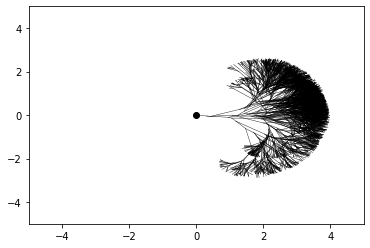

In [2]:
import singleneuronmodel as snm
plt.xlim(right=5,left=-5)
plt.ylim(top=5,bottom=-5)
plt.scatter(0,0,color="black")

#Parameters are (angle_lower_bound,angle_upperbound,T,lambd,initial_position)
edges = snm.growingneuron(-m.pi/6,m.pi/6,4,2,[0,0])

### 3. A network level model

_You will need ***'networkmodel.py'*** and ***'nmgraphtools.py'*** for this chapter._

#### 3.1. Connectivity ###

In order to construct networks from this single neuron model, Ajazi et al. define a notion of connectivity for two neurons grown on the same plane [1].

Firstly, we define a notion of distance between the tree of a neuron starting at $s$, $N_s(t)$, and a point $\omega$.

***Definition 1.*** Let $N_s(t)$ represent the axonal tree of a neuron starting at $s$ after time $t$. Let $\omega \in \mathbb{R}^2$. The ***distance*** between $N_s(t)$ and $\omega$ is denoted by $d(N_s(t),\omega)$ where
\begin{align}
    d(N_s(t),\omega):=\min\{||x-\omega||:x\in N_s(t)\}
\end{align}
where $||\cdot||$ represents the standard Euclidean distance in $\mathbb{R}^2$

With this notion of distance, we now introduce a new parameter, $r$, called the ***radius***. We now define our notion of directed connectivity.

***Definition 2.*** Let $N_s(t),N_\omega(t)$ represent the axonal trees of neurons $S,\Omega$ starting at $s,\omega$ after time $t$. Let $r$ be the radius, a given parameter in the model. We say that neuron $S$ is ***connected*** to neuron $\Omega$ if $d(N_s(t),\omega)\leq r$.

In order to use the notion of connectivity, we must be able to calculate this distance for a practical example. A method for calculating this distance depends on how the neuron is simulated. A fair assumption is to assume that once a neuron is simulated, we have stored the ***edge-set*** of the axonal tree. This is a set $E\subset \mathbb{R}^2\times\mathbb{R}^2$ and uniquely defines the tree.

Let $S_e$ represent the segment connecting the two endpoints for an edge $e=[(a_1,b_1),(a_2,b_2)]$. Then we have that,
\begin{align}
    d(N_s(t),\omega)&=\min\{d(S_e(t),\omega):e\in E\}
\end{align}
where $N_s(t)$ is the axonal tree of a neuron starting at $s$, $E$ is its edge set and $\omega \in \mathbb{R}^2$.

We follow P. Bourke’s method for finding the distance between a
point and a segment [4].

In [3]:
import networkmodel as nm
#Parameters are (P1,P2,P) where the segment connects P1 and P2 and P is another point - the function returns the distance between the segment and P
nm.dist_point_to_segment([0,0],[0,1],[6,0.5])

6.0

#### 3.2. Networks of neurons  

Following again from Ajazi et al., we assume the soma of the neurons are distributed randomly on some rectangle $[x_1,x_2]\times[y_1,y_2]$ forming a 2D Poisson process with intensity $\mu$ [1].

Our model has now expanded its parameter set to include, in addition to the previous parameters,
 - $[x_1,x_2],[y_1,y_2]$ - the dimensions of the rectangle in the plane where the soma can be placed.
 - $r$ - the radius of connectivity.
 - $\mu$ - the intensity of the Poisson process governing the number of soma. 
 

In order to simulate a network, we first place the soma, by simulating a Poisson process and then grow an axonal from each of these soma using the single neuron model. Finally we determine the connectivity of these neurons and build the adjacency matrix.

This code is in the file ***'networkmodel.py'***. It can take a few seconds to display.

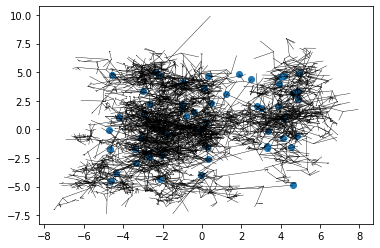

In [4]:
import networkmodel as nm
#Parameters are (mu,x_range,y_range,angle_lowerbound,angle_upperbound,T,lambda,radius)
Network = nm.growRandomNetwork(0.4,[-5,5],[-5,5],-m.pi,m.pi,4,1,1)

We can display this as a network using the ***NetworkX*** Python package.

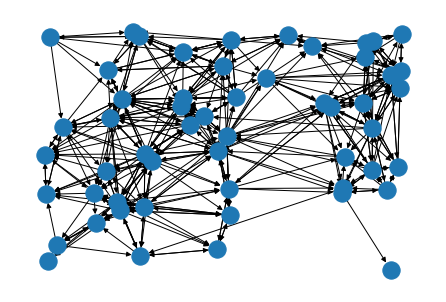

In [5]:
import nmgraphtools as nmgt
G=nmgt.makeGraph(Network)
nmgt.plotGraph(G)

And then perform basic analysis,

Nodes: 54
Edges: 445
Average degree: 16.48148148148148


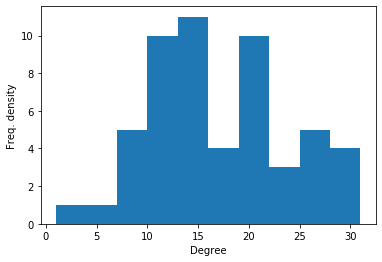

In [6]:
nmgt.basicAnalysisGraph(G)
nmgt.plotDegreeDistribution(G)

### 4. Excitatory-Inhibitory Networks

_For this chapter you will need the files ***'EInetworkmodel.py'*** and ***'EIgraphtools.py'***_

Neurons are either ***excitatory*** or ***inhibitory*** [5][6]. Excitatory-inhibitory (E-I) classifications have been implemented into a range of computational models. Most often, E-I classifications are implemented in spiking and/or recurrent neural networks (SNNs \& RNNs) [7].

To extend our model to E-I classes we say that each neuron is either excitatory or inhibitory for all times and all connections. We make the further assumption that each neuron is classified as either excitatory or inhibitory with some constant probability, given by a random uniform variable. Finally for simplicity, at this stage, we assume that the branching rate for all neurons is the same.
In order to determine the probability of a neuron being either excitatory or inhibitory, we must introduce another parameter. We denote the proportion of inhibitory to excitatory neurons by $\gamma \in [0,1]$. Experimental results have shown that this varies depending on brain area. Experimental values vary between 0.07 and 0.48 [8]. A typical value for computational models is 0.2.

We will represent exictatory neurons in black and inhibitory neurons in orange. The code for this function is in ***'EInetworkmodel.py'***.

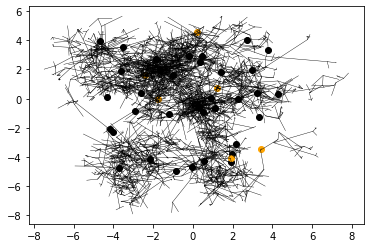

In [2]:
import EInetworkmodel as EI
#Parameters are (mu,x_range,y_range,angle_lowerbound,angle_upperbound,T,lambda,radius,gamma)
EINetwork = EI.growRandomEINetwork(0.4,[-5,5],[-5,5],-m.pi,m.pi,4,1,1,0.2)

This is now a hyper-graphical structure which gives us more choice in how we choose to display it. The most obvious, and simplest, display option, is as before but with orange and black nodes representing the neuron type.

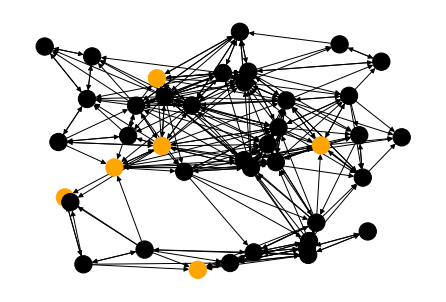

In [5]:
import EIgraphtools as EIgt

#This function produces a nx graph and a colour mapping
colourGraph = EIgt.makeColourHyperGraph(EINetwork)
#This function displays said graph
EIgt.plotColourGraph(colourGraph[0],colourGraph[1])

However, there is an equivalence between a bipartite graph and a hyper-graphs [9]. We can also perform the ***star expansion*** to transform our order $n$ hyper-graph into a bipartite graph with $n+2$ nodes. Our two neuron types become nodes in our network and each original node is connected to the node representing its neuron type.

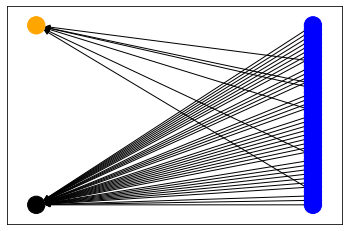

In [6]:
import EIgraphtools as EIgt

starMatrix = EIgt.starExpansion(EINetwork)
starGraph = EIgt.plotStarGraph(starMatrix)

These expanded graphs are less useful visually, as they do not
display positions or inter-layer connections very well. For this reason, we represent hyper-graphical classes using different techniques
throughout the project.

Similar analysis to before can be performed, now drawing distinction between E-I classes.

Nodes: 43
Neurons: 41
Excitory: 35
Inhibitory: 6


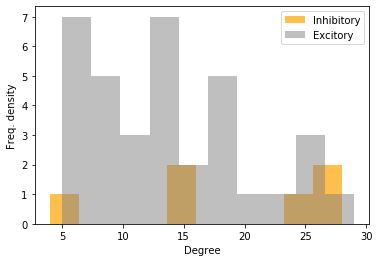

In [8]:
EIgt.EIGraphNumberOfNodes(starGraph)
degrees = EIgt.calculateEIDegreeDistribution(EINetwork)
EIgt.plotEIDegreeDistribution(degrees[0],degrees[1])

### 5. Clustered networks: local and projection neurons

_For this chapter you will need ***'CNmodel.py'***,***'CNgraphtools.py'*** and ***'mynetworkx.py'***_ 

An effective way to model different brain areas, using this model, is to consider each brain area as a dense ***cluster*** of neurons somewhat separated from a distinct cluster. As this is a growth model and therefore a bottom-up model, we do not impose restrictions on what we define to be a cluster, we control the model and the parameters in a motivated way that should produce sufficient clustering and a valid model of distinct brain regions. 

To do this, we classify neurons as either ***projection*** neurons or ***local*** neurons. We represent projection neurons in <font color=red>red</font> and local neurons in <font color=green>green</font>.

We also make the follow assumptions when extending the model:
 - The branching rate for the two neuron types is different
 - The Poisson point process dictating the number and position of soma has different intensity.
 - The radius of connectivity is the same for all neurons.
 - The angle bounds are the same for all neurons.
 - The branching rate and Poisson process intensity is the same for each cluster.

By reducing the branching rate, we can cause projection neurons to grow further in a single direction and increase the probability that they reach another cluster. A lower branching rate, for local neurons, will increase the probability that they form connections with nearby neurons.

This means we have to remove two parameters $\lambda,\mu$ and introduce four new ones:
 - $\lambda_P$ - the branching rate for a projection neuron
 - $\lambda_L$ - the branching rate for a local neuron
 - $\mu_P$ - the intensity of the Poisson point process governing the number of projection neurons
 - $\mu_L$ - the intensity of the Poisson point process governing the number of local neurons

We assume that $\lambda_L > \lambda_P$ in order to model their biological behaviour. The values of $\mu_P$ and $\mu_L$ vary depending on which brain area you aim to model.

#### 5.1. Structuring a clustered network

We consider the rectangle $[x_1,x_2]\times[y_1,y_2]$. Dividing this rectangle in 9 equal sub-rectangles, we label 5 rectangles as the clusters, as shown in the Figure below

<img src="cs.jpg">

We simulate two Poisson point processes in each one of the sub-rectangles, one for each neuron type. 

#### 5.2. Connectivity of clusters

We can go beyond connectivity of individual neurons, and define a weighted connection between the 5 clusters.

***Definition 3.***
Cluster $A$ is said to be ***connected*** to cluster $B$ if $\exists$ a neuron in $A$ connected to a neuron in $B$. The ***weight***, $w$, of this connection is the number of connections between $A$ and $B$.

The following code grows a clustered network which can then be displayed and analysed both at cluster and neuron level. This cell can take a little bit longer to run.

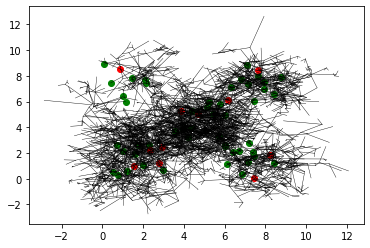

In [13]:
import CNmodel as cnm
#Parameters are (inter_mu,proj_mu,x_range,y_range,angle_lowerbound,angle_upperbound,T,inter_lamb,proj_lamb,radius)
LocProjNetwork = cnm.growRandomClusteredLocProjNetwork(1,0.2,[0,9],[0,9],-m.pi,m.pi,4,1,0.5,1)

First, we can plot the network as normal, at neuronal level.

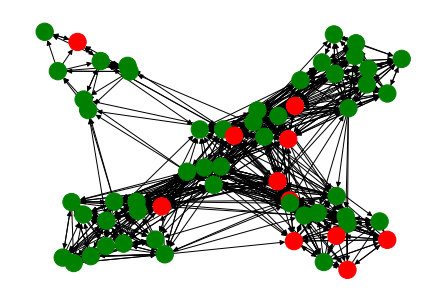

In [15]:
import CNgraphtools as cngt
G = cngt.makeColourHyperGraphLocProj(LocProjNetwork)
cngt.plotColourGraph(G[0],G[1])

The clusters and their level of interconnectivity is somewhat apparent. However, it is much easier to see in the weighted cluster model that is calculated in the cell below.

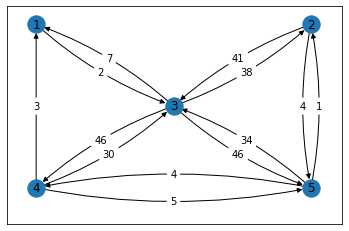

In [16]:
import CNgraphtools as cngt
WCG=cngt.WeightedClusterGraph(LocProjNetwork)
PWCG=cngt.makeWeightedClusterGraph(WCG)

This weighted graph represents the level of interconnectivity very clearly. Similarly to before, we can now do some basic analysis on the hyper-graphical structure, such as calculate degree distribution. 

Neurons: 60
Projectory Neurons: 11
Interneurons: 49


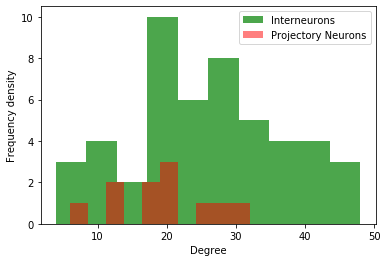

In [21]:
cngt.LocProjGraphNumberOfNodes(LocProjNetwork)
degrees = cngt.calculateLocProjDegreeDistribution(LocProjNetwork)
cngt.plotLocProjDegreeDistribution(degrees[0],degrees[1])

However, in this clustered model, we might be more interested in how many connections a neuron has out of its home cluster. We denote this ***projectory degree***. This can be plotted using the code below.

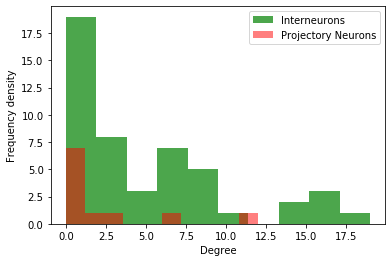

In [24]:
projectoryDegrees=cngt.calculateProjectoryDegree(LocProjNetwork)
degrees=cngt.calculateLocProjProjectoryDegreeDistribution(LocProjNetwork,projectoryDegrees)
cngt.plotLocProjDegreeDistribution(degrees[0],degrees[1])

### 6. Machine learning: layered neural networks

_For this chapter you will need the files: ***LNmodel.py***, ***LNgraphtools.py***._

At the intersection of computational neuroscience and machine learning is the field of ***neuromorphic machine learning (NML)***. Researchers in this area aim to build biologically motivated/plausible artificialintelligence (AI) systems, often with the end goal of whole brain emulation and conscious AI.  NML researchers aim to mimic the connectivity in the brain whilst still having a network capable of learning.

In order to extend this model to the simulation of layered neural networks, there are some key differences that need to be factored into the design.

In order for this model to be useful for NML, the number of input and output neurons should be specified as parameters to the model. Furthermore, another feature depending on the nature of the problem, and the nature of the research, is the number of hidden layers. This should also be specified as a parameter to the model.

This gives the model three new parameters:
 - $N_I$ - the number of neurons in the input layer.
 - $N_O$ - the number of neurons in the output layer.
 - $H$ - the number of layers.

We are also assuming here that the intensity of the Poisson process
that controls the number of neurons in a layer is constant for all
hidden layers.

#### 6.1. Structuring a layered network

In this model extension, we discard the parameter $[x_1,x_2]\times[y_1,y_2]$ as space is of reduced importance. We now restrict the $y$-position of any generated soma to be in the range $[0,8]$. The $x$-position must be in the range $[0,2H]$. If the $x$-position of a soma is in the range $[2(l-1),2l]$, we say that it is in the layer $l$.

<img src="ls.jpg">

Furthermore, we restrict connections to only feedforward connections.

In high level steps, the method is:
 1. Distribute $N_I$ soma in the strip $[0,2]\times[0,8]$.
 2. Distribute $N_O$ soma in the strip $[2(H-1),2H]\times[0,8]$.
 3. For each hidden layer, generate the number of soma using the Poisson point process with area 16 and distribute in the strip.
 4. For each soma, grow a tree with narrow angle bounds and record the connectivity of the network, only allowing connection between layer $l$ and $l+1$.
 5. Use the $y$-position of the soma to order the neurons in their layers and discard the $x$-position.
 6. Display the result as a directed network.

The following cell will generate a layered network that can then be displayed as a layered neural network. This code is in ***LNmodel.py***. This cell can take a little longer to execute.

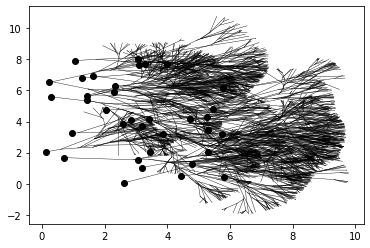

In [28]:
import LNmodel as ln
#Parameters are (mu,inputLayer,outputLayer,noLayers,angle_lowerbound,angle_upperbound,T,lamb,radius)
LayeredNetwork = ln.growRandomLayeredNetwork(1,10,10,3,-m.pi/6,m.pi/6,4,1,1)

We can now plot this as a layered network following the steps above and using the code in ***LNgraphtools.py***.

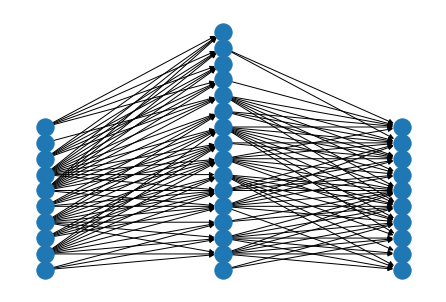

In [30]:
import LNgraphtools as lngt
G=lngt.makeLayeredGraph(LayeredNetwork)
lngt.plotLayeredGraph(G)

#### 6.2. Filtering unused nodes

The model has the ability to produce some networks with connections that do not influence the outcome of learning in the network.

Some of these cannot be helped without compromising the integrity of the model (i.e. forcing connections), or could be used for special features, such as:
 - Input nodes may not connect to the subsequent layer meaning that an input remains unused. But guaranteeing connections compromises the underlying principles of the model, so we do not force connections. It is best to generate another network.
 - A node may have output connections but no input connections. These nodes can be important in probabilistic machine learning or machine learning with stochastic activation functions as they can still add noise. This is actually beneficial for sampling networks that aim to produce independent samples of a posterior distribution from data. If necessary, the input can be assumed to be 0. As such, we leave them in.
 - A node in the output layer may have no connections, making that classification impossible to achieve. Again, guaranteeing connections compromises the underlying principles of the model. If the network is being used for a regression problem, it can still be used. If it is being used for a classification problem, some classifications are impossible to achieve and so another network should be simulated.

However, some serve no functional purpose and as such should be removed from the network, such as:

 - A node may have input connections but no output connections.
 - A node may no connections, and be in a hidden layer.

In these cases, we remove the unused/disconnected nodes from the network using the code below.

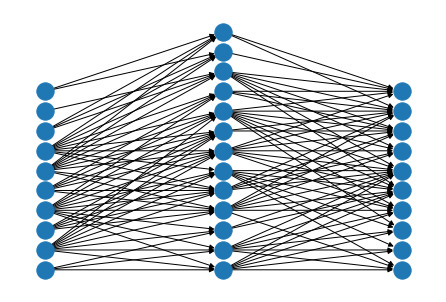

In [33]:
G=lngt.makeLayeredGraph(lngt.removeUnusedNodes(lngt.removeDisconnectedNodes(LayeredNetwork)))
lngt.plotLayeredGraph(G)

#### 6.4. E-I layered networks

_For this section you will need the file ***EILNmodel.py***  and ***LNgraphtools.py***_ 

In the field of NML, particularly with spiking neural networks, E-I classes are considered in learning networks. By combing the ideas from Chapter 4, we can simulate an E-I layered neural network. The algorithm remains almost unchanged except we add one stage
where we classify each node into either excitatory or inhibitory in
the same way as chapter 4.

The cell below grows and displays the E-I layered network. This cell can take a little longer to run.

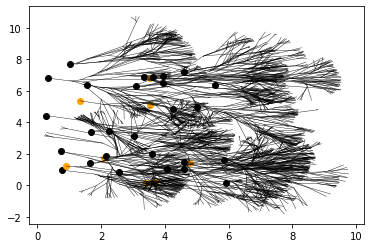

In [38]:
import EILNmodel as EIln
import LNgraphtools as lngt
#Parameters are (mu,inputLayer,outputLayer,noLayers,angle_lowerbound,angle_upperbound,T,lamb,radius,gamma)
EILayeredNetwork = EIln.growRandomEILayeredNetwork(1,10,10,3,-m.pi/6,m.pi/6,4,1,1,0.2)

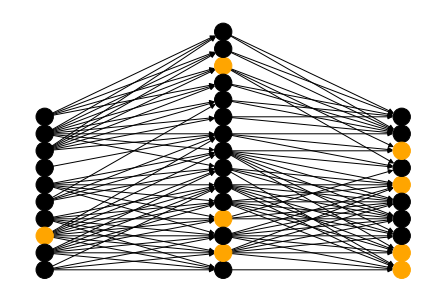

In [39]:
G = lngt.makeLayeredGraph(EILayeredNetwork)
CM = EIln.makeColourMap(EILayeredNetwork[1])
EIln.plotColouredLayeredGraph(G,CM)

### 7. Hopfield networks

Hopfield networks are an example of a recurrent neural network. This means that nodes can connect into themselves, either directly or through a path. Hopfield network are also an example of a network used for learning, with the particularity that they have ’memory’. They are not organised into layers, and as such have no ’output’. The output of a Hopfield network is the entire state of the network at a given time. The networks also have symmetric connections with symmetric weights. The positions of nodes in space are not considered in the Hopfield network. As a result, The Hopfield network is the simplest model in this project. It is not a hyper-graphical structure and has no additional classes.

We do not consider the weights in this project as we are focused on generating a Hopfield structure rather than a learning algorithm. We also need to modify our notion of connectivity for the Hopfield network so that it is ***symmetric***.